<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/k_fold_cross_validation_model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Fold Cross Validation\
is same as SVM

## Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part10_ModelSelection&Boosting/Section48-ModelSelection/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

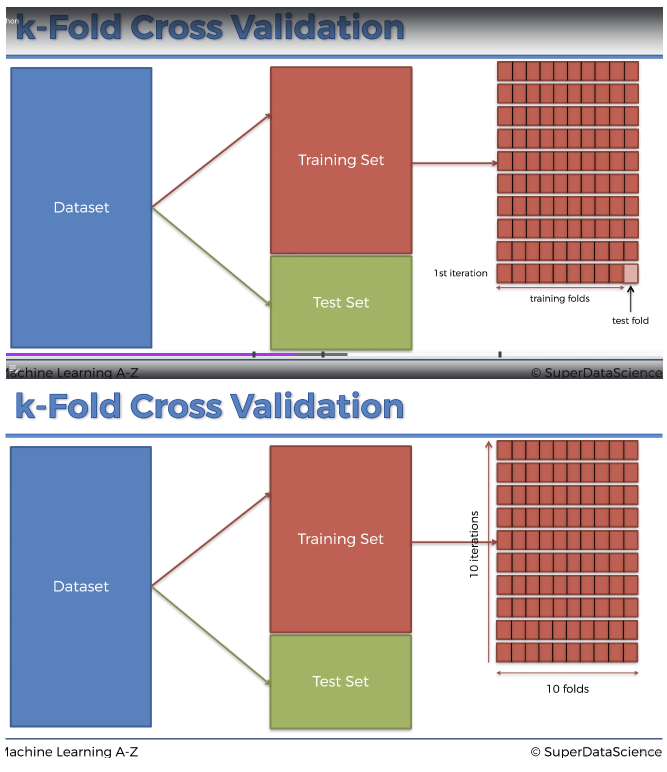

in k-fold => we have 10 different fold with 10 different train_test_fold it means we have 10 different  accuracy on the  different test set and we find the best accuracy



```
In machine learning, "accuracy" and "standard deviation" are commonly used metrics, but they represent different aspects of a model's performance or a dataset's characteristics:

1. **Accuracy**:
    - **Definition**: Accuracy is a metric that quantifies the number of correct predictions made by a model out of all predictions. It is usually expressed as a percentage.
    - **Formula**: \( \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \)
    - **Usage**: It's often used in classification problems to measure the performance of a model. For instance, in binary classification, it can be calculated as the sum of true positives and true negatives divided by the total number of samples.
    - **Limitation**: While accuracy can be a good initial metric to gauge performance, it may not be informative when dealing with imbalanced datasets. In such cases, other metrics like precision, recall, F1-score, or the area under the ROC curve (AUC-ROC) might be more informative.

2. **Standard Deviation**:
    - **Definition**: Standard deviation measures the amount of variation or dispersion in a set of values. It gives an idea of how spread out the numbers in a dataset are from the mean (average) of that dataset.
    - **Formula**: \( \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2} \) where \( \sigma \) is the standard deviation, \( N \) is the number of observations, \( x_i \) is each individual observation, and \( \mu \) is the mean of the observations.
    - **Usage**: In the context of machine learning:
        - It can be used to describe the distribution of input features. Features with high standard deviation might have higher information content (although not necessarily).
        - It can also represent the variability in model performance, especially when assessing results across multiple runs or using techniques like cross-validation. For instance, if you're using 10-fold cross-validation, you'll get 10 accuracy scores, and the standard deviation among these scores can give an idea about the consistency of your model.
    - **Limitation**: Alone, it doesn't provide a complete picture. Knowing the mean along with the standard deviation gives a fuller understanding of data distribution.

In the context of model evaluation, accuracy tells you how well your model is performing, while standard deviation (used, for example, in the results from cross-validation) tells you about the consistency or variability of your model's performance across different data splits or runs.
```



## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) #classifier is the svm kernel selected model #cv=> number of train-test-fold
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))                   #{:.2f}=> it means shows float number with 2 decimal number  #accuracies.mean()=>get average of 10 fold accuaracy in last line code and then shows its as a percentage
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


and let's see what the standard deviation is.

So it is 6.57%, and that means only one thing.

That means that more or less,

while the 10 accuracy resulting from our test fold fall more

or less between 90.33 minus 6.57,

and 90.33 plus 6.57, in other words,

they fall around between 83.5% and 96.5%.

## Visualising the Training set results

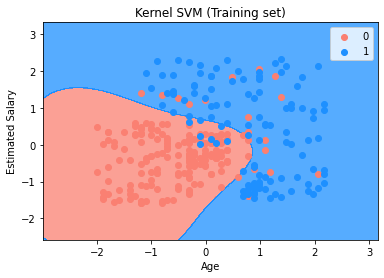

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

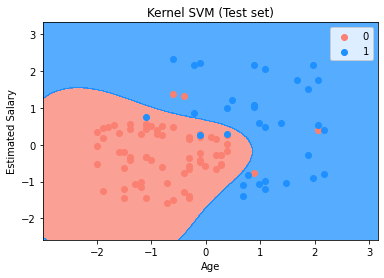

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()